<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/Voronoi_Geometric_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary Classification

Building a [Veronoi Geometric Classifer](https://en.wikipedia.org/wiki/Voronoi_diagram#Natural_sciences) using the [iris dataset](http://yann.lecun.com/exdb/mnist/).

In [39]:
import pandas as pd
import numpy as np


from sklearn.datasets import load_iris

iris = load_iris()
irisdf = pd.DataFrame(data=iris.data, columns=iris.feature_names)
irisdf["variety"] = iris.target
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Right now this is a multiclass problem
To make it binary let's decide between

Setosa +1

Not Setosa -1

In [40]:
irisdf['variety'].unique()

array([0, 1, 2])

In [41]:
binary_map = {'Setosa':1,'Versicolor':-1, 'Virginica':-1} #a python dict

In [42]:
irisdf['variety'] = irisdf['variety'].map(binary_map)

In [43]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN


Let's split the dataset up into

Training set: Used to create the model, for us computing $C_{+}$, $C_{-}$

Validation set: for setting hyper parameters/deciding between 10 different models

Testing set: "real" out of sample data

e.g. Kaggle competitions


In [44]:
train = irisdf.sample(frac = 0.8, random_state = 12)
temp = irisdf.drop(train.index)
validation = temp.sample(frac = 0.5, random_state = 12)
test = temp.drop(validation.index)

In [45]:
print(train.shape)
print(validation.shape)
print(test.shape)

(120, 5)
(15, 5)
(15, 5)


In [46]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
40,5.0,3.5,1.3,0.3,NaN
146,6.3,2.5,5.0,1.9,NaN
38,4.4,3.0,1.3,0.2,NaN
99,5.7,2.8,4.1,1.3,NaN
143,6.8,3.2,5.9,2.3,NaN


In [47]:
C1 = train[train['variety']==1]
C2 = train[train['variety']==-1]

In [48]:
C2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety


In [49]:
C1 = C1.sum(axis=0).to_numpy()[0:4]/C1.shape[0]
C2 = C2.sum(axis=0).to_numpy()[0:4]/C2.shape[0]
C = (C1+C2)/2.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [51]:
def f(x):
    return np.sign((x-C)@(C1-C2))

In [52]:
f(C)

nan

In [53]:
validation.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
45,4.8,3.0,1.4,0.3,NaN
118,7.7,2.6,6.9,2.3,NaN
109,7.2,3.6,6.1,2.5,NaN
89,5.5,2.5,4.0,1.3,NaN
13,4.3,3.0,1.1,0.1,NaN


In [54]:
validation_prediction = f(validation.iloc[:,0:4].to_numpy())

In [55]:
validation_prediction

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [56]:
100*np.sum(validation['variety']==validation_prediction)/validation.shape[0]

0.0

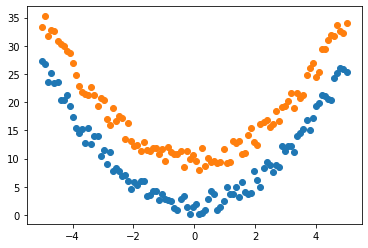

In [57]:
x = np.linspace(-5, 5, 100)
x1 = x**2
x2 = (x)**2+8

xplus = np.column_stack((x, x1+np.random.rand(x.shape[0])*4, np.ones(x.shape[0])))
xminus = np.column_stack((x, x2+np.random.rand(x.shape[0])*4, -np.ones(x.shape[0])))

data = np.row_stack((xplus,xminus))

import matplotlib.pyplot as plt
plt.scatter(xplus[:,0],xplus[:,1]) 
plt.scatter(xminus[:,0],xminus[:,1])

In [58]:
df = pd.DataFrame(data, columns = ['x1','x2','y'])

train = df.sample(frac = 0.8, random_state = 12)
temp = df.drop(train.index)
validation = temp.sample(frac = 0.5, random_state = 12)
test = temp.drop(validation.index)

C1 = train[train['y']==1]
C2 = train[train['y']==-1]

C1 = C1.sum(axis=0).to_numpy()[0:4]/C1.shape[0]
C2 = C2.sum(axis=0).to_numpy()[0:4]/C2.shape[0]
C = (C1+C2)/2.0

def f(x):
    return (x-C)@(C1-C2)

In [59]:
validation_Mat = validation.iloc[:,0:4].to_numpy()
f_validation = f(validation_Mat)
validation['y_prediction'] = np.sign(f_validation)
validation_pct = 100*np.sum(validation['y']==validation['y_prediction'])/validation.shape[0]
validation_pct

50.0

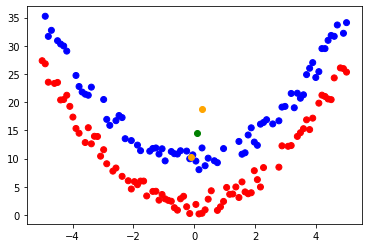

In [64]:
plt.scatter(train.iloc[:,0],train.iloc[:,1], color = train.iloc[:,2].map({1:'r',-1:'b'}))
plt.scatter(C[0], C[1], color = 'green')
plt.scatter(C1[0], C1[1],color = 'orange')
plt.scatter(C2[0], C2[1],color = 'orange')

By changing from the dot product to a differnt kind of product

the "kernel trick"

Two things in one: Take the data and embed it in another space, define a new distance measurement (via an inner product) After this the data could be linearly separable

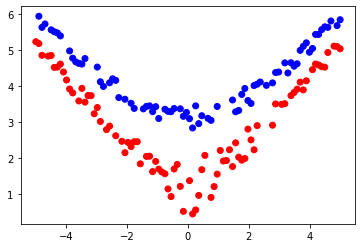

In [61]:
plt.scatter(train.iloc[:,0],np.sqrt(train.iloc[:,1]), color = train.iloc[:,2].map({1:'r',-1:'b'}))
